In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse, r2_score as r2
from sklearn.model_selection import train_test_split,cross_val_score

import warnings
warnings.filterwarnings("ignore")

## Importing Data set

In [2]:
df=pd.read_csv("cars.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 17.7+ KB


In [4]:
df["normalized-losses"].value_counts()

?      41
161    11
91      8
150     7
104     6
134     6
128     6
95      5
168     5
94      5
103     5
85      5
102     5
65      5
74      5
106     4
122     4
93      4
148     4
118     4
115     3
154     3
125     3
83      3
101     3
137     3
87      2
129     2
192     2
89      2
153     2
81      2
113     2
145     2
164     2
119     2
110     2
194     2
158     2
108     2
197     2
188     2
77      1
231     1
90      1
186     1
107     1
98      1
142     1
256     1
121     1
78      1
Name: normalized-losses, dtype: int64

In [5]:
df["horsepower"].value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
101     6
88      6
62      6
114     6
160     6
102     5
76      5
97      5
82      5
145     5
84      5
92      4
86      4
123     4
111     4
152     3
121     3
73      3
207     3
85      3
182     3
90      3
176     2
52      2
155     2
56      2
162     2
100     2
156     2
?       2
184     2
94      2
112     2
161     2
135     1
140     1
262     1
55      1
120     1
175     1
142     1
288     1
60      1
134     1
115     1
58      1
154     1
78      1
64      1
143     1
106     1
48      1
72      1
200     1
Name: horsepower, dtype: int64

In [6]:
df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


## Handling Missing Values

If we observed in info there are some features having objects data types even they contains Numbers. so we have to replace those values with their mean values.

In [7]:
# Step 1 - Replace with Nan Values
df["normalized-losses"].replace("?",np.nan,inplace=True)
df["horsepower"].replace("?",np.nan,inplace=True)

# Step 2- Change Data type
df["normalized-losses"]=df["normalized-losses"].astype("float")
df["horsepower"]=df["horsepower"].astype("float")

# Step 3- filling mean values
df["normalized-losses"].fillna(df["normalized-losses"].mean(),inplace=True)
df["horsepower"].fillna(df["horsepower"].mean(),inplace=True)

In [8]:
df["normalized-losses"].value_counts()

122.0    45
161.0    11
91.0      8
150.0     7
104.0     6
134.0     6
128.0     6
94.0      5
74.0      5
85.0      5
103.0     5
168.0     5
95.0      5
65.0      5
102.0     5
148.0     4
106.0     4
93.0      4
118.0     4
115.0     3
154.0     3
125.0     3
137.0     3
101.0     3
83.0      3
194.0     2
110.0     2
145.0     2
119.0     2
197.0     2
108.0     2
188.0     2
129.0     2
81.0      2
164.0     2
192.0     2
158.0     2
153.0     2
87.0      2
89.0      2
113.0     2
121.0     1
98.0      1
186.0     1
78.0      1
107.0     1
77.0      1
90.0      1
256.0     1
231.0     1
142.0     1
Name: normalized-losses, dtype: int64

In [9]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# Handling Outliers

<AxesSubplot:xlabel='price'>

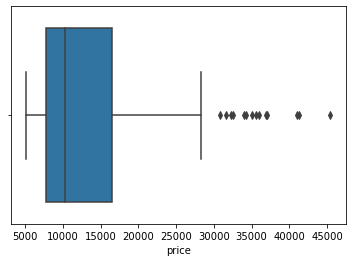

In [10]:
sns.boxplot(df['price'])

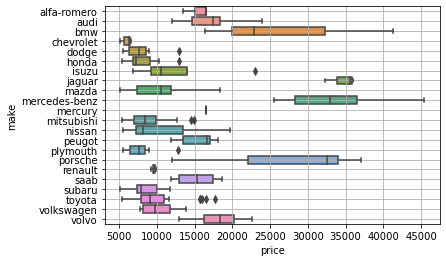

In [11]:
sns.boxplot(data=df,x='price',y='make')
plt.grid(True)

<AxesSubplot:xlabel='make'>

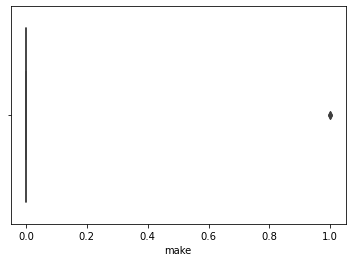

In [12]:
sns.boxplot(df['make']=="renault")

In [13]:
df.make.value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [14]:
df[(df["make"]=="toyota") & (df["price"]>15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


In [15]:
df.drop([172,178,179,180,181],inplace=True)

In [16]:
df[(df["make"]=="dodge") & (df["price"]>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12964


In [17]:
df.drop(29,inplace=True)

In [18]:
df[(df["make"]=="honda") & (df["price"]>12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28,12945


In [19]:
df[(df["make"]=="isuzu") & (df["price"]>20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [20]:
df[(df["make"]=="mitsubishi") & (df["price"]>14000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
83,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14869
84,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14489


In [21]:
df[(df["make"]=="plymouth") & (df["price"]>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [22]:
df.drop([124,83,84,45,41],inplace=True)

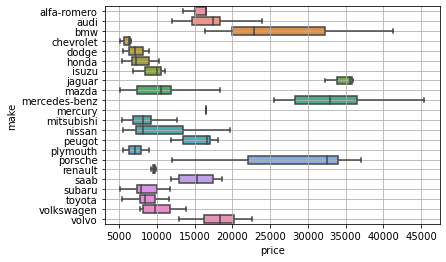

In [23]:
sns.boxplot(data=df,x='price',y='make')
plt.grid(True)

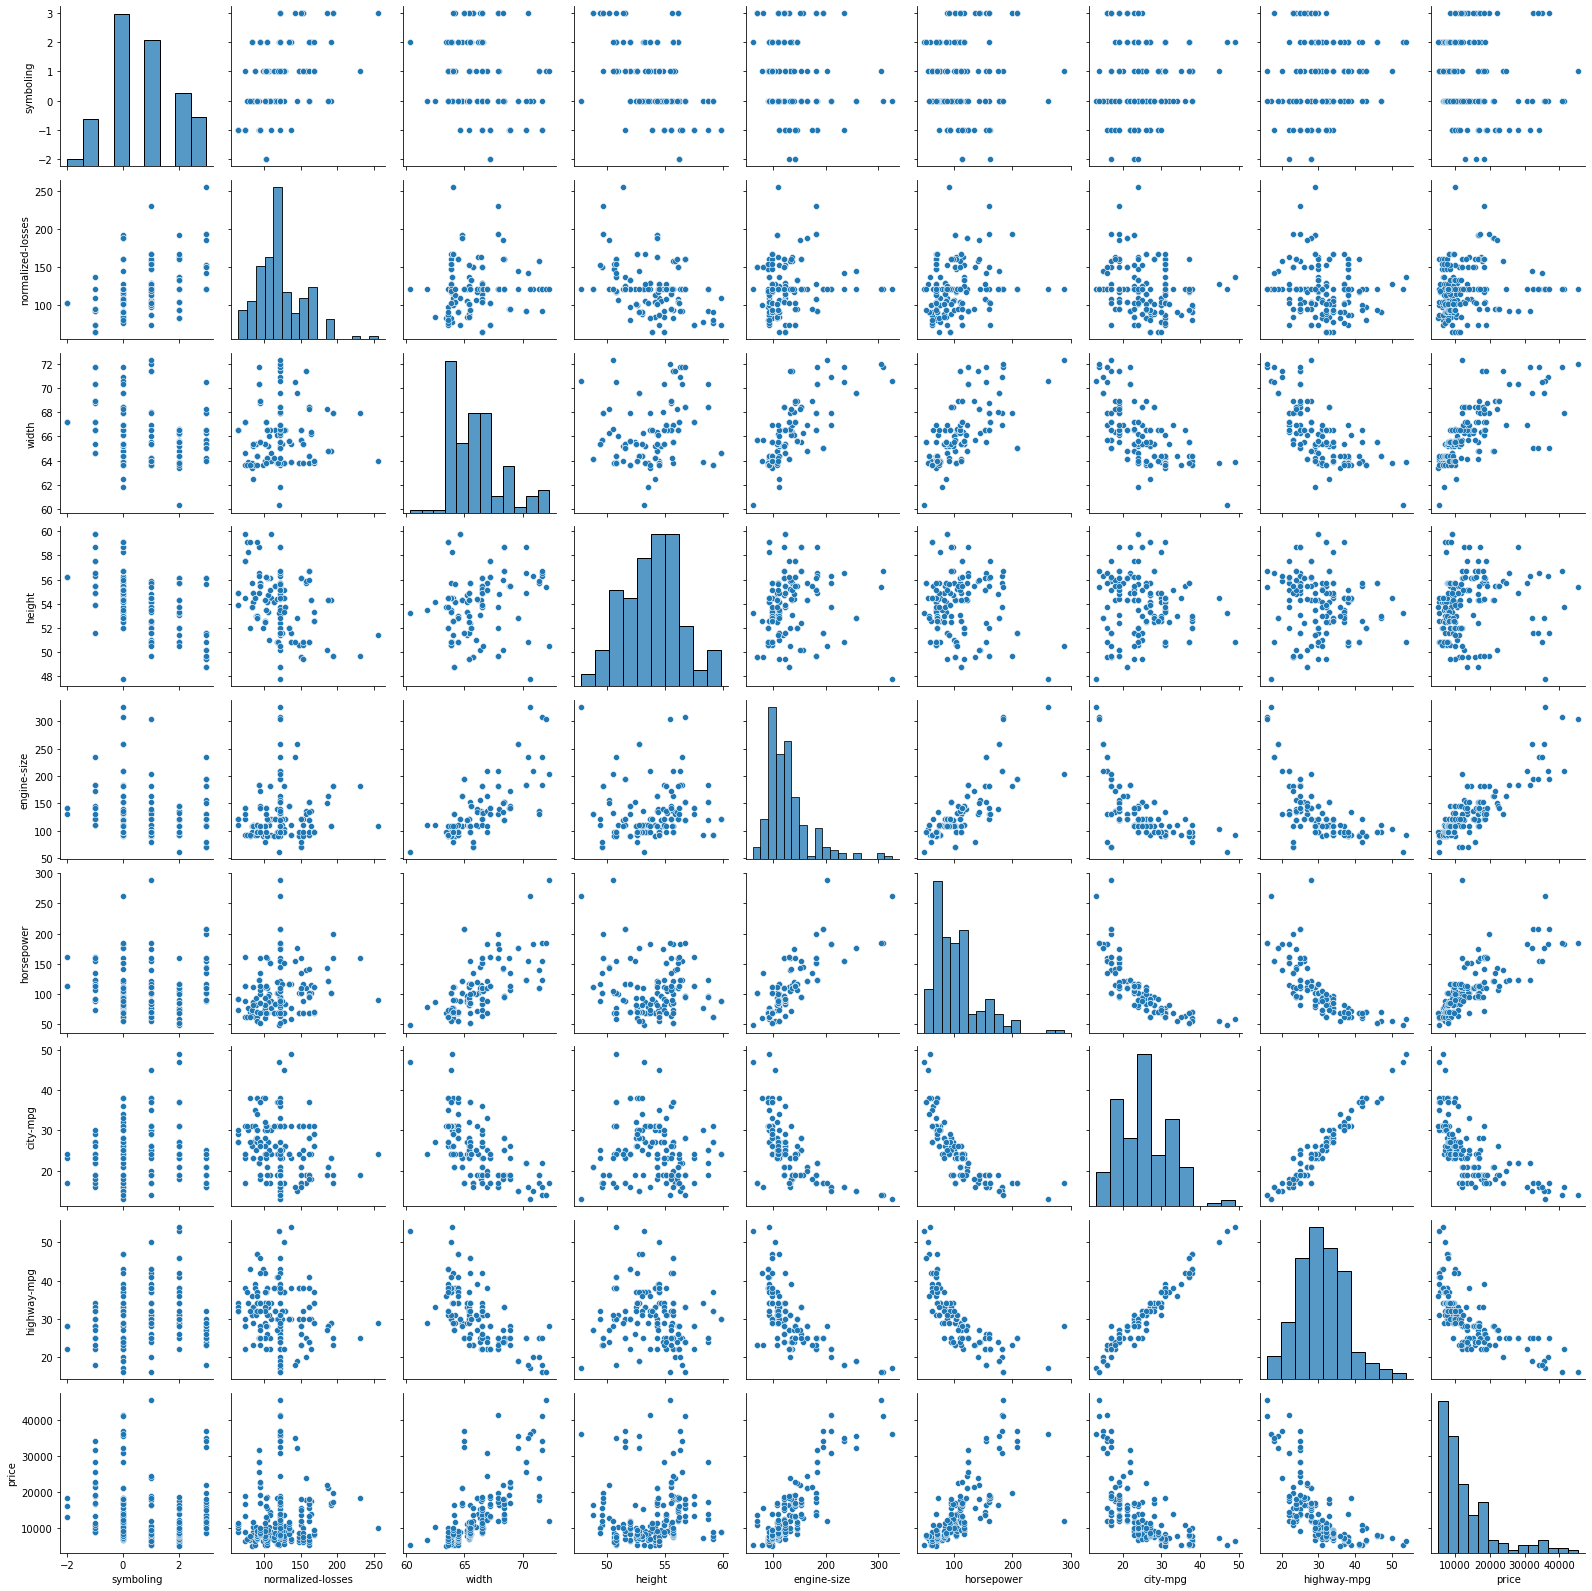

In [24]:
sns.pairplot(df)

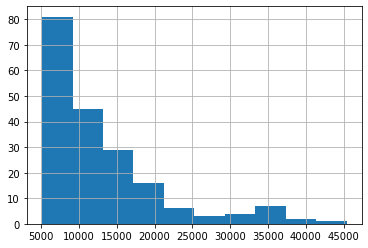

In [25]:
plt.hist(df["price"])
plt.grid(True)
plt.show()

In [26]:
df["body-style"].value_counts() # Important

sedan          93
hatchback      64
wagon          24
hardtop         8
convertible     5
Name: body-style, dtype: int64

In [27]:
df["drive-wheels"].value_counts() # Important

fwd    115
rwd     70
4wd      9
Name: drive-wheels, dtype: int64

In [28]:
df.corrwith(df["price"])

symboling           -0.095905
normalized-losses    0.129973
width                0.730503
height               0.147010
engine-size          0.869638
horsepower           0.768921
city-mpg            -0.680412
highway-mpg         -0.704846
price                1.000000
dtype: float64

In [29]:
df=df.drop(["city-mpg","highway-mpg","symboling"],axis=1)

In [30]:
df.head()

,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,price
0,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,13495
1,122.0,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,16500
2,122.0,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,16500
3,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,13950
4,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,17450


In [31]:
df_num=df.select_dtypes(["int64","float64"])
df_cat=df.select_dtypes("object")

## label encoding

In [32]:
from sklearn.preprocessing import LabelEncoder

for i in df_cat:
    le=LabelEncoder()
    df_cat[i]=le.fit_transform(df_cat[i])

In [33]:
df_cat

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3
...,...,...,...,...,...,...
200,21,1,3,2,0,3
201,21,1,3,2,0,3
202,21,1,3,2,0,5
203,21,0,3,2,0,3


In [34]:
df_new=pd.concat([df_cat,df_num],axis=1)
df_new.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,normalized-losses,width,height,engine-size,horsepower,price
0,0,1,0,2,0,0,122.0,64.1,48.8,130,111.0,13495
1,0,1,0,2,0,0,122.0,64.1,48.8,130,111.0,16500
2,0,1,2,2,0,5,122.0,65.5,52.4,152,154.0,16500
3,1,1,3,1,0,3,164.0,66.2,54.3,109,102.0,13950
4,1,1,3,0,0,3,164.0,66.4,54.3,136,115.0,17450


<AxesSubplot:>

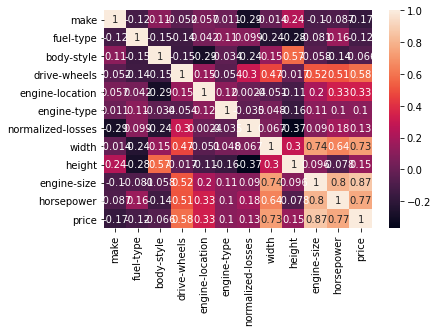

In [35]:
sns.heatmap(df_new.corr(),annot=True)

In [131]:
df_new.corrwith(df["price"])

make                -0.173792
fuel-type           -0.115791
body-style          -0.065831
drive-wheels         0.584485
engine-location      0.333620
engine-type          0.102758
normalized-losses    0.129973
width                0.730503
height               0.147010
engine-size          0.869638
horsepower           0.768921
price                1.000000
dtype: float64

## Split x & y

In [145]:
x=df_new.iloc[:,:-1].values
y=df_new.iloc[:,-1].values

In [146]:
x[0]

array([  0. ,   1. ,   0. ,   2. ,   0. ,   0. , 122. ,  64.1,  48.8,
       130. , 111. ])

In [147]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

## Train model

In [148]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_depth=6,random_state=101) # Selcting Max accuracy value of max_depth
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [149]:
## Hyper Parameter Tunning
def createm(model):
    model.fit(xtrain, ytrain)
    ypred= model.predict(xtest)
    print("r2 accuracy:-",r2(ytest,ypred))
    return model

In [150]:
for i in range (2,20):
    dt2 = DecisionTreeRegressor(min_samples_leaf=i,random_state=0)
    print(i)
    createm(dt2)

2
r2 accuracy:- 0.8486789456399229
3
r2 accuracy:- 0.8372160563042821
4
r2 accuracy:- 0.8335167940990287
5
r2 accuracy:- 0.8207758946968571
6
r2 accuracy:- 0.8265299794398433
7
r2 accuracy:- 0.8236392706552645
8
r2 accuracy:- 0.8210324100712021
9
r2 accuracy:- 0.8172345945796906
10
r2 accuracy:- 0.7286000600563716
11
r2 accuracy:- 0.7285791753890665
12
r2 accuracy:- 0.7236147113373742
13
r2 accuracy:- 0.7056544823835524
14
r2 accuracy:- 0.7056544823835524
15
r2 accuracy:- 0.7051892638064386
16
r2 accuracy:- 0.7065231473665994
17
r2 accuracy:- 0.6430388123238613
18
r2 accuracy:- 0.6430388123238613
19
r2 accuracy:- 0.6430388123238613


In [1]:
# Hyper parameter tunning with max_depth parameter

In [151]:
for i in range (2,50):
    dt2 = DecisionTreeRegressor(max_depth=i,random_state=101)
    print(i)
    createm(dt2)

2
r2 accuracy:- 0.7824010540686058
3
r2 accuracy:- 0.790009927387725
4
r2 accuracy:- 0.8276033288127226
5
r2 accuracy:- 0.8063247864253626
6
r2 accuracy:- 0.8586641054641759
7
r2 accuracy:- 0.8521903010714981
8
r2 accuracy:- 0.8309774451188848
9
r2 accuracy:- 0.823363291419499
10
r2 accuracy:- 0.8557802107751942
11
r2 accuracy:- 0.8478836485969878
12
r2 accuracy:- 0.8524809275953195
13
r2 accuracy:- 0.8538982079360384
14
r2 accuracy:- 0.8434888839806174
15
r2 accuracy:- 0.8434888839806174
16
r2 accuracy:- 0.8434888839806174
17
r2 accuracy:- 0.8434888839806174
18
r2 accuracy:- 0.8434888839806174
19
r2 accuracy:- 0.8434888839806174
20
r2 accuracy:- 0.8434888839806174
21
r2 accuracy:- 0.8434888839806174
22
r2 accuracy:- 0.8434888839806174
23
r2 accuracy:- 0.8434888839806174
24
r2 accuracy:- 0.8434888839806174
25
r2 accuracy:- 0.8434888839806174
26
r2 accuracy:- 0.8434888839806174
27
r2 accuracy:- 0.8434888839806174
28
r2 accuracy:- 0.8434888839806174
29
r2 accuracy:- 0.8434888839806174
30

## Evaluation of model

In [152]:
from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse, r2_score as r2
print("mae :-",mae(ytest,ypred))
print("mse :-",mse(ytest,ypred))
print("rmse :-",np.sqrt(mse(ytest,ypred)))
print("r2 accuracy:-",r2(ytest,ypred))

mae :- 1864.0571025020176
mse :- 11618849.793288074
rmse :- 3408.64339485492
r2 accuracy:- 0.8586641054641759
